<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

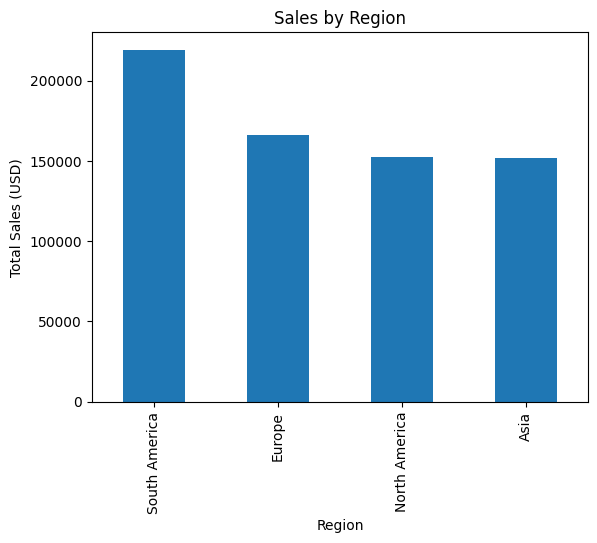

Region with highest sales: South America
Region with lowest sales: Asia


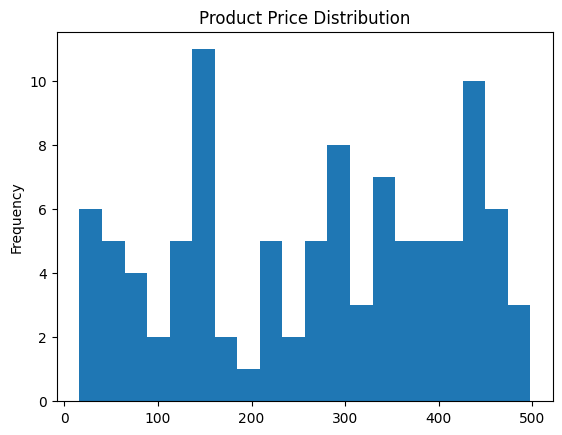

Price distribution: Min=16.08, Max=497.76, Mean=267.55170000000004


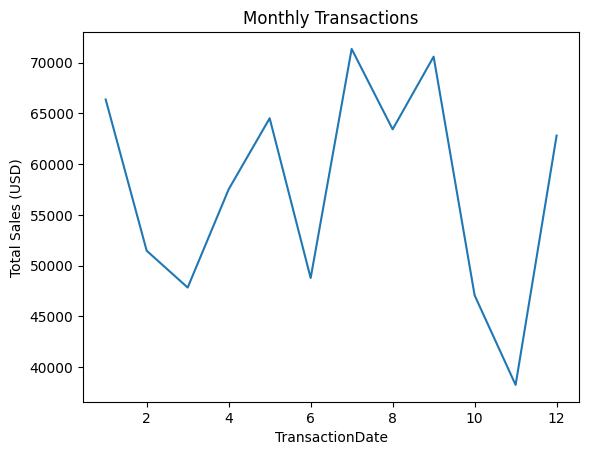

Month with peak sales: 7
Month with lowest sales: 11
Region with highest sales: South America
Region with lowest sales: Asia
Price distribution shows that the most expensive product costs 497.76
The cheapest product costs 16.08
Average product price is 267.55170000000004
Peak sales month: 7 with sales of 71366.39
Lowest sales month: 11 with sales of 38224.37
Top 5 customers by transaction volume:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64
Top 5 product categories by sales:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64
Average transaction value: 689.9955600000001
Average days to first purchase: 350.023
Average days to first purchase: 350.023


In [10]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import os

# Ensure output directory exists
if not os.path.exists("../outputs"):
    os.makedirs("../outputs")

# Load datasets
customers = pd.read_csv("../data/Customers.csv")
products = pd.read_csv("../data/Products.csv")
transactions = pd.read_csv("../data/Transactions.csv")

# Data overview
print(customers.info())
print(products.info())
print(transactions.info())

# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Check for missing values
print(merged_data.isnull().sum())

# Visualize sales by region
def visualize_sales_by_region():
    region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
    region_sales.plot(kind='bar', title="Sales by Region", ylabel="Total Sales (USD)")
    plt.savefig("../outputs/Rudrakumar_Patel_sales_by_region.png")  # Save the figure
    plt.show()

    # Generate insights from Region Sales
    highest_sales_region = region_sales.idxmax()
    lowest_sales_region = region_sales.idxmin()
    print(f"Region with highest sales: {highest_sales_region}")
    print(f"Region with lowest sales: {lowest_sales_region}")

    return region_sales

# Visualize product price distribution
def visualize_product_price_distribution():
    products['Price'].plot(kind='hist', bins=20, title="Product Price Distribution")
    plt.savefig("../outputs/Rudrakumar_Patel_product_price_distribution.png")  # Save the figure
    plt.show()

    # Generate insights from Product Price Distribution
    price_distribution = products['Price'].describe()
    print(f"Price distribution: Min={price_distribution['min']}, Max={price_distribution['max']}, Mean={price_distribution['mean']}")
    
    return price_distribution

# Visualize transactions over time
def visualize_transactions_over_time():
    transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
    monthly_sales = transactions.groupby(transactions['TransactionDate'].dt.month)['TotalValue'].sum()
    monthly_sales.plot(kind='line', title="Monthly Transactions")
    plt.ylabel("Total Sales (USD)")
    plt.savefig("../outputs/Rudrakumar_Patel_transactions_over_time.png")  # Save the figure
    plt.show()

    # Generate insights from Monthly Transactions
    peak_month = monthly_sales.idxmax()
    lowest_month = monthly_sales.idxmin()
    print(f"Month with peak sales: {peak_month}")
    print(f"Month with lowest sales: {lowest_month}")
    
    return monthly_sales

# Perform EDA visualizations 
visualize_sales_by_region()
visualize_product_price_distribution()
visualize_transactions_over_time()

# Insight 1: Region-wise Sales
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
highest_sales_region = region_sales.idxmax()
lowest_sales_region = region_sales.idxmin()
print(f"Region with highest sales: {highest_sales_region}")
print(f"Region with lowest sales: {lowest_sales_region}")

# Insight 2: Product Price Distribution
price_distribution = products['Price'].describe()
print(f"Price distribution shows that the most expensive product costs {price_distribution['max']}")
print(f"The cheapest product costs {price_distribution['min']}")
print(f"Average product price is {price_distribution['mean']}")

# Insight 3: Monthly Transactions
monthly_sales = transactions.groupby(transactions['TransactionDate'].dt.month)['TotalValue'].sum()
peak_month = monthly_sales.idxmax()
lowest_month = monthly_sales.idxmin()
print(f"Peak sales month: {peak_month} with sales of {monthly_sales.max()}")
print(f"Lowest sales month: {lowest_month} with sales of {monthly_sales.min()}")

# Insight 4: Transaction volume by customer
customer_transactions = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print("Top 5 customers by transaction volume:")
print(customer_transactions.head())

# Insight 5: Product category performance
category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("Top 5 product categories by sales:")
print(category_sales.head())

# Insight 6: Average transaction value
avg_transaction_value = merged_data['TotalValue'].mean()
print(f"Average transaction value: {avg_transaction_value}")

# Insight 7: Time between sign-up and first purchase
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])
merged_data['FirstPurchase'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['DaysToFirstPurchase'] = (merged_data['FirstPurchase'] - merged_data['SignupDate']).dt.days
avg_days_to_first_purchase = merged_data['DaysToFirstPurchase'].mean()
print(f"Average days to first purchase: {avg_days_to_first_purchase}")

# Saving insights to PDF
insights = [
    f"Region with highest sales: {highest_sales_region}",
    f"Region with lowest sales: {lowest_sales_region}",
    f"Most expensive product costs {price_distribution['max']}",
    f"Cheapest product costs {price_distribution['min']}",
    f"Average product price is {price_distribution['mean']}",
    f"Peak sales month: {peak_month}",
    f"Lowest sales month: {lowest_month}",
    f"Top 5 customers by transaction volume: {customer_transactions.head().to_list()}",
    f"Top 5 product categories by sales: {category_sales.head().to_list()}",
    f"Average transaction value: {avg_transaction_value}",
    f"Average days to first purchase: {avg_days_to_first_purchase}"
]

with PdfPages("../outputs/Rudrakumar_Patel_EDA.pdf") as pdf:
    plt.figure(figsize=(8, 6))
    plt.text(0.5, 0.5, "\n".join(insights), ha='center', va='center', fontsize=12)
    plt.axis('off')
    pdf.savefig()
    plt.close()

# Print dynamically generated insights
    print(insight)